# Preprocessing
Run everything starting from here until the next section.

In [1]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(10)

In [2]:
os.listdir()

['properties.txt',
 '18065-venv',
 '.DS_Store',
 'explore.ipynb',
 'README.md',
 '.gitignore',
 'preprocessing.py',
 '.ipynb_checkpoints',
 '.git',
 'web-redditEmbeddings-subreddits.csv',
 'plots',
 'soc-redditHyperlinks-body.tsv']

In [3]:
df = pd.read_csv('soc-redditHyperlinks-body.tsv', sep='\t')

In [4]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [5]:
properties = []
with open('properties.txt') as fp:
    line = fp.readline()
    line = fp.readline()
    while line and len(line) > 0:
        line = fp.readline()
        properties.append(line[3:-1])
        
propsDf = df["PROPERTIES"].str.split(",", expand=True) 
for i in range(len(properties)):
    prop = properties[i]
    df[prop] = propsDf[i].astype("float64")
df.drop(columns="PROPERTIES",inplace=True)

In [362]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,345.0,298.0,0.756522,0.017391,0.086957,...,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,101.0,98.0,0.742574,0.019802,0.049505,...,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,85.0,85.0,0.752941,0.023529,0.082353,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,1124.0,949.0,0.772242,0.001779,0.057829,...,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,715.0,622.0,0.777622,0.006993,0.025175,...,0.016667,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333


In [7]:
top_count = 15
source_vc = dict(df["SOURCE_SUBREDDIT"].value_counts())
target_vc = dict(df["TARGET_SUBREDDIT"].value_counts())
top_sources = sorted([(sub,source_vc[sub]) for sub in source_vc],reverse=True,key=lambda x: x[1])[:top_count]
top_targets = sorted([(sub,target_vc[sub]) for sub in target_vc],reverse=True,key=lambda x: x[1])[:top_count]

In [8]:
top_sources_names = [t[0] for t in top_sources]
top_targets_names = [t[0] for t in top_targets]
filtered_df = df[df["SOURCE_SUBREDDIT"].isin(top_sources_names)][df["TARGET_SUBREDDIT"].isin(top_targets_names)]

/Users/juliafiksinski/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


# Data Visualization (Plots)

In [35]:
source_freq = [dict(df["SOURCE_SUBREDDIT"].value_counts())[x] for x in dict(df["SOURCE_SUBREDDIT"].value_counts())]

KeyboardInterrupt: 

In [ ]:
# plt.hist(df["SOURCE_SUBREDDIT"])

In [14]:
### Code to generate histograms for distribution visualization
# hist_columns = [' Negative sentiment calculated by VADER',
#                 ' Positive sentiment calculated by VADER',
#                 ' Compound sentiment calculated by VADER',
#                ' Average word length',
#                'Number of words',
#                'Number of unique works',
#                ' Average number of characters per sentence']
# filenames = ['negative_vader','positive_vader','compound_vader',
#              'average_word_length','num_words','num_unique_words',
#             'average_chars_per_sentence']
# for i in range (len(hist_columns)):
#     filename = filenames[i]
#     plt.hist(df[hist_columns[i]],bins=10000)
#     plt.title(hist_columns[i][1:])
#     plt.savefig("plots/"+filename+".png")
#     plt.show()

In [20]:
# plt.hist(df[' Positive sentiment calculated by VADER'],bins=10000)
# plt.savefig("plots/positive_vader.png")
# plt.show()

# Graphs

In [103]:
column = "leagueoflegends"

In [106]:
df[df["TARGET_SUBREDDIT"]==column]

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
72,circloljerk,leagueoflegends,1u7kcns,2014-01-01 19:30:46,1,1648.0,1417.0,0.736044,0.001820,0.033374,...,0.029046,0.008299,0.000000,0.000000,0.004149,0.020747,0.004149,0.000000,0.000000,0.004149
318,leagueofgiving,leagueoflegends,1ue7ugs,2014-01-04 09:18:47,1,625.0,559.0,0.752000,0.038400,0.086400,...,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.010526,0.000000,0.000000,0.000000
687,dawngate,leagueoflegends,1umgahs,2014-01-07 12:29:25,1,511.0,457.0,0.745597,0.033268,0.046967,...,0.012048,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
785,subredditdrama,leagueoflegends,1uok68s,2014-01-07 19:53:10,1,6571.0,5552.0,0.789225,0.003805,0.032111,...,0.043946,0.025112,0.000897,0.006278,0.000897,0.000000,0.003587,0.000000,0.000000,0.000000
1255,feelsofjustice,leagueoflegends,1uyh70s,2014-01-11 05:51:00,1,250.0,228.0,0.764000,0.008000,0.036000,...,0.027027,0.027027,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286060,tristanamains,leagueoflegends,685sk2s,2017-04-28 11:51:00,1,686.0,582.0,0.782799,0.010204,0.017493,...,0.061404,0.026316,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
286064,reksaimains,leagueoflegends,685u8gs,2017-04-27 08:54:40,1,812.0,683.0,0.779557,0.008621,0.018473,...,0.051095,0.021898,0.000000,0.007299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
286070,karthusmains,leagueoflegends,68605ks,2017-04-28 16:31:33,1,811.0,682.0,0.779285,0.008631,0.018496,...,0.051095,0.021898,0.000000,0.007299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
286075,urgotmains,leagueoflegends,68631fs,2017-04-27 07:39:27,1,811.0,682.0,0.779285,0.008631,0.018496,...,0.051095,0.021898,0.000000,0.007299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [105]:
df[df["SOURCE_SUBREDDIT"]==column].shape

(840, 91)

In [78]:
G=nx.from_pandas_edgelist(df, 
                          source='SOURCE_SUBREDDIT', 
                          target='TARGET_SUBREDDIT',
                          create_using=nx.DiGraph())

In [69]:
pageranks = nx.pagerank(G)

In [70]:
np.mean([pageranks[rank] for rank in pageranks])

2.7951699463327364e-05

In [71]:
# closeness_centrality = nx.closeness_centrality(G)

In [72]:
left_eig = nx.algorithms.centrality.eigenvector_centrality(G)

In [74]:
np.mean([left_eig[rank] for rank in left_eig])

0.001285459760708005

In [80]:
degree_centrality = nx.degree_centrality(G)
np.mean([degree_centrality[rank] for rank in degree_centrality])

0.00021536442609281571

In [79]:
in_degree_centrality = nx.in_degree_centrality(G)
np.mean([degree_centrality[rank] for rank in in_degree_centrality])

0.0001942828676044999

In [81]:
out_degree_centrality = nx.out_degree_centrality(G)
np.mean([degree_centrality[rank] for rank in in_degree_centrality])

0.00021536442609281571

In [ ]:
# betweenness_centrality = nx.betweenness_centrality(G)

NameError: name 'top_sources' is not defined

In [9]:
len(filtered_df)

5691

In [50]:
G_filtered = nx.from_pandas_edgelist(filtered_df, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT')

In [60]:
filtered_df["SOURCE_SUBREDDIT"].describe()

count             1985
unique              15
top       outoftheloop
freq               264
Name: SOURCE_SUBREDDIT, dtype: object

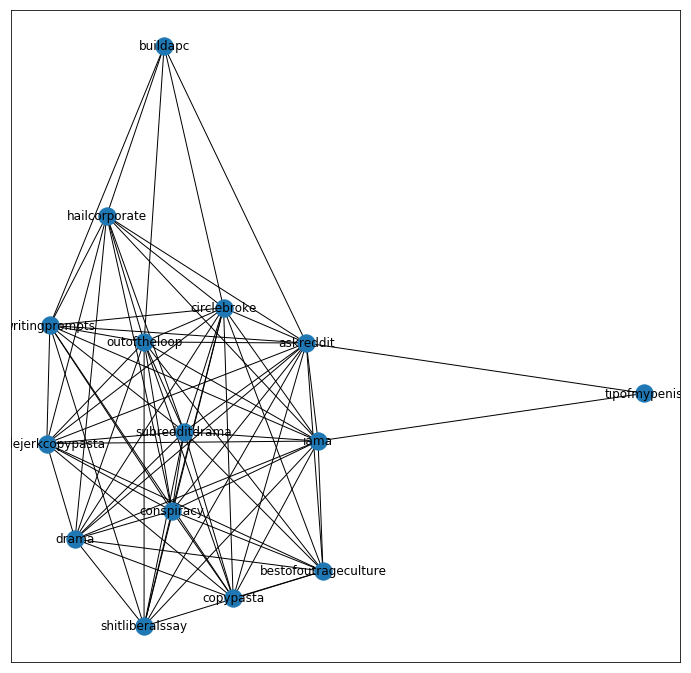

In [61]:
plt.figure(3,figsize=(12,12)) 
nx.draw_networkx(G_filtered,arrows=True)
# nx.draw_networkx_labels(G, pos[, labels, …])



# Linear Regression

In [9]:
# pip install sklearn
from sklearn.preprocessing import OneHotEncoder, normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [10]:
df.columns

Index(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP',
       'LINK_SENTIMENT', 'Number of characters without counting white space',
       'Fraction of alphabetical characters', 'Fraction of digits',
       'Fraction of uppercase characters', 'Fraction of white spaces',
       'Fraction of special characters, such as comma, exclamation mark, etc.',
       'Number of words', 'Number of unique works',
       ' Number of long words (at least 6 characters)', ' Average word length',
       ' Number of unique stopwords', ' Fraction of stopwords',
       ' Number of sentences', ' Number of long sentences (at least 10 words)',
       ' Average number of characters per sentence',
       ' Average number of words per sentence', ' Automated readability index',
       ' Positive sentiment calculated by VADER',
       ' Negative sentiment calculated by VADER',
       ' Compound sentiment calculated by VADER', ' LIWC_Funct',
       ' LIWC_Pronoun', ' LIWC_Ppron', ' LIWC_I', ' LIWC_W

In [11]:
predict_column = ["LINK_SENTIMENT"]
non_train_columns = ["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT", "POST_ID", "TIMESTAMP"] + predict_column
train_columns = [col for col in df.columns if col not in non_train_columns]


In [12]:
reg = LinearRegression(normalize=True)
X = np.array(df[train_columns])
# y = np.array(df[predict_column])
y = np.squeeze(np.array(df[predict_column]))
y = np.where(y<0, 0,y)
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [13]:
print(reg.score(X,y))
ypreds = reg.predict(X)
print(mse(y,ypreds))

0.07091511302724895
0.06329006861170731


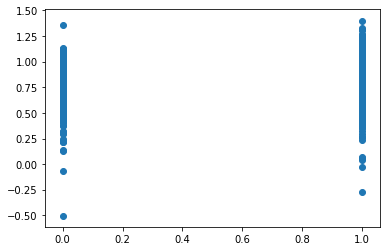

In [14]:
plt.scatter(y,ypreds)
plt.show()

In [15]:
np.dot(np.array(df[train_columns].iloc[0]), reg.coef_)

1385463675.3351364

In [16]:
df[train_columns].columns

Index(['Number of characters without counting white space',
       'Fraction of alphabetical characters', 'Fraction of digits',
       'Fraction of uppercase characters', 'Fraction of white spaces',
       'Fraction of special characters, such as comma, exclamation mark, etc.',
       'Number of words', 'Number of unique works',
       ' Number of long words (at least 6 characters)', ' Average word length',
       ' Number of unique stopwords', ' Fraction of stopwords',
       ' Number of sentences', ' Number of long sentences (at least 10 words)',
       ' Average number of characters per sentence',
       ' Average number of words per sentence', ' Automated readability index',
       ' Positive sentiment calculated by VADER',
       ' Negative sentiment calculated by VADER',
       ' Compound sentiment calculated by VADER', ' LIWC_Funct',
       ' LIWC_Pronoun', ' LIWC_Ppron', ' LIWC_I', ' LIWC_We', ' LIWC_You',
       ' LIWC_SheHe', ' LIWC_They', ' LIWC_Ipron', ' LIWC_Article',
    

In [17]:
corr = df.corr()

In [18]:
corr_dict = dict(corr["LINK_SENTIMENT"])
sorted([(key, corr_dict[key]) for key in corr_dict], key=lambda t: abs(t[1]),reverse=True)

[('LINK_SENTIMENT', 1.0),
 (' LIWC_Sad', -0.1937843149630818),
 (' LIWC_Anx', -0.19026888657385765),
 (' Compound sentiment calculated by VADER', -0.18358772930389877),
 (' LIWC_Funct', 0.17012614818631064),
 (' LIWC_Social', -0.12198509262651887),
 (' LIWC_Ingest', -0.08774823615422249),
 (' LIWC_Affect', -0.0861938972314726),
 (' LIWC_Posemo', -0.0807544164159014),
 ('Fraction of digits', -0.07373510184329474),
 (' LIWC_Family', -0.07141111187965091),
 (' LIWC_Ipron', -0.06619028279107014),
 (' LIWC_They', -0.06029237218979959),
 (' LIWC_Body', -0.05986795697075054),
 ('Fraction of white spaces', 0.05025256576559943),
 (' LIWC_Anger', -0.04786300170207798),
 (' LIWC_Quant', -0.04785802070551377),
 (' LIWC_CogMech', -0.04735575704789673),
 (' LIWC_Article', -0.04715833161177882),
 (' LIWC_Assent', -0.044763583443085585),
 (' LIWC_Inhib', -0.04370125356031719),
 (' Negative sentiment calculated by VADER', 0.04225550128698732),
 (' Fraction of stopwords', -0.04056408538214915),
 (' LIWC

In [19]:
[(df[train_columns].columns[x[0]],x[1]) for x in sorted(list(enumerate(reg.coef_)), key=lambda tup: abs(tup[1]),reverse=True)]


[(' LIWC_Article', -489520919488.468),
 (' LIWC_I', -489520919488.43475),
 (' LIWC_Ppron', 489520919488.41595),
 ('Fraction of special characters, such as comma, exclamation mark, etc.',
  1385463675.754674),
 ('Number of words', 1385463675.2928376),
 ('Fraction of digits', 1385463675.2532852),
 ('Fraction of uppercase characters', 1385463675.1823332),
 (' LIWC_Sad', -2.149512746570927),
 (' LIWC_Affect', -0.9373353195219275),
 (' LIWC_Ingest', -0.9011679909215979),
 (' LIWC_Anx', -0.7960659713056635),
 (' LIWC_You', 0.7606327987891109),
 (' LIWC_Dissent', -0.7073070316664833),
 (' LIWC_Nonflu', 0.5209899792019228),
 (' LIWC_Assent', 0.5038350395424208),
 (' LIWC_Humans', 0.48537395812788825),
 ('', -0.48103485988582334),
 (' LIWC_SheHe', 0.4342862656511324),
 (' LIWC_Sexual', -0.406480975781543),
 (' LIWC_Adverbs', 0.38393461363285114),
 (' LIWC_Certain', 0.3704175535185517),
 (' LIWC_Anger', 0.36686083341037123),
 (' LIWC_Tentat', 0.35456651659520944),
 (' LIWC_Excl', 0.3524694611401

In [20]:
ypreds

array([1.00684714, 0.94913983, 0.92198539, ..., 0.88982725, 0.94226766,
       0.89429188])

In [21]:
df.shape

(286561, 91)

In [197]:
top_df = df[(df["SOURCE_SUBREDDIT"].isin(top_sources_names)) | (df["TARGET_SUBREDDIT"].isin(top_targets_names))]
top_df.shape

(57412, 91)

In [198]:
reg = LogisticRegression(max_iter=1000)
X = np.array(df[train_columns])
X = normalize(X)
y = np.squeeze(np.array(df[predict_column]))
y = np.where(y<0, 0,y) # change all -1s to 0s
reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
print(reg.score(X,y))
ypreds = reg.predict(X)
print(mse(y,ypreds))

0.9264728975680571
0.07352710243194294


In [288]:
top_reg = LogisticRegression(max_iter=1000)
top_X = np.array(top_df[train_columns])
top_X = normalize(top_X)
top_y = np.squeeze(np.array(top_df[predict_column]))
top_y = np.where(top_y<0, 0,top_y) # change all -1s to 0s
top_reg.fit(top_X,top_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
print(top_reg.score(top_X,top_y))
top_ypreds = top_reg.predict(top_X)
print(mse(top_y,top_ypreds))

0.856754685431617
0.1432453145683829


In [202]:
X_train, X_test, y_train, y_test = train_test_split(top_X, top_y, test_size=0.1)

In [203]:
top_reg = LogisticRegression(max_iter=100)
top_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
print("Train score", top_reg.score(X_train, y_train)) # comparing results from filtered df with(out) train/test
print("Test score", top_reg.score(X_test, y_test)) # comparing results from filtered df with(out) train/test
test_ypreds = top_reg.predict(X_test)
print(mse(y_test,test_ypreds))

Train score 0.8564544222953357
Test score 0.8594566353187043
0.14054336468129572


In [207]:
tree = DecisionTreeClassifier()
X = np.array(df[train_columns])
y = np.squeeze(np.array(df[predict_column]))
tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [208]:
print(tree.score(X,y))
ypreds = tree.predict(X)
print(mse(y,ypreds))

0.9970582179710428
0.01176712811582874


In [209]:
top_tree = DecisionTreeClassifier()
top_X = np.array(top_df[train_columns])
top_y = np.squeeze(np.array(top_df[predict_column]))

In [210]:
top_tree.fit(top_X,top_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [211]:
print(top_tree.score(top_X,top_y))
top_ypreds = top_tree.predict(top_X)
print(mse(top_y,top_ypreds))

0.9965512436424441
0.013795025430223647


In [215]:
X_train, X_test, y_train, y_test = train_test_split(top_X, top_y, test_size=0.1)

In [216]:
top_tree = DecisionTreeClassifier(min_samples_split=100,random_state=10)
top_tree.fit(X_train,y_train) # trying now with training/testing sets

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [217]:
print("Train score", top_reg.score(X_train, y_train)) # comparing results from filtered df with(out) train/test
print("Test score", top_reg.score(X_test, y_test)) # comparing results from filtered df with(out) train/test
test_ypreds = top_reg.predict(X_test)
print(mse(y_test,test_ypreds))

Train score 0.8562415328043352
Test score 0.8613723441309649
0.5545106234761407


In [68]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(top_X,top_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
print(KNN_model.score(top_X,top_y))
knn_ypreds = KNN_model.predict(top_X)
print(mse(top_y,knn_ypreds))

0.873963631296593
0.12603636870340695


In [ ]:
# using subreddit embeddings

In [130]:
cols = ["SOURCE_SUBREDDIT"] + list(range(0,300)) # making header for embeddings

In [131]:
source_embeds = pd.read_csv("web-redditEmbeddings-subreddits.csv",names=cols)

In [132]:
source_embeds.head()

,SOURCE_SUBREDDIT,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,spiders,0.158972,0.285813,0.226329,-0.183338,-0.163159,-0.188910,0.422705,0.168602,0.178193,...,-0.025041,0.184655,0.111942,-1.125799,0.223129,-0.387323,-0.234882,-0.252297,-0.054315,0.500009
1,askreddit,-0.499114,0.323983,-0.424809,-0.222705,-0.327201,0.412856,1.040088,0.996697,-1.256240,...,0.072151,0.226658,0.535705,0.039861,-0.027087,-0.239952,0.554510,0.676439,-0.328846,0.941547
2,globaloffensivetrade,-0.023145,-1.199374,1.661484,-1.025296,1.424670,-1.179507,-1.035703,0.329301,-0.567272,...,2.998430,-1.235703,-0.326850,4.381238,-1.965378,-2.369674,-0.615389,2.010601,-0.919314,-2.149625
3,fireteams,2.492506,-2.529917,-0.448484,-3.543441,-0.586122,-0.101517,1.837567,-0.215715,-2.460388,...,-1.875214,0.969291,0.497958,2.941132,2.423561,1.315691,-0.959618,0.151845,-0.852492,-0.467526
4,funny,-0.819370,-0.865261,0.301753,0.018787,0.201029,0.070462,0.903895,1.038460,-0.306950,...,1.364194,0.830233,-0.137822,-2.204667,-0.162008,0.390291,-0.556404,0.322684,0.641634,1.320716


In [139]:
target_embeds = source_embeds.rename(columns = {"SOURCE_SUBREDDIT":"TARGET_SUBREDDIT"})
target_embeds.head()

,TARGET_SUBREDDIT,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,spiders,0.158972,0.285813,0.226329,-0.183338,-0.163159,-0.188910,0.422705,0.168602,0.178193,...,-0.025041,0.184655,0.111942,-1.125799,0.223129,-0.387323,-0.234882,-0.252297,-0.054315,0.500009
1,askreddit,-0.499114,0.323983,-0.424809,-0.222705,-0.327201,0.412856,1.040088,0.996697,-1.256240,...,0.072151,0.226658,0.535705,0.039861,-0.027087,-0.239952,0.554510,0.676439,-0.328846,0.941547
2,globaloffensivetrade,-0.023145,-1.199374,1.661484,-1.025296,1.424670,-1.179507,-1.035703,0.329301,-0.567272,...,2.998430,-1.235703,-0.326850,4.381238,-1.965378,-2.369674,-0.615389,2.010601,-0.919314,-2.149625
3,fireteams,2.492506,-2.529917,-0.448484,-3.543441,-0.586122,-0.101517,1.837567,-0.215715,-2.460388,...,-1.875214,0.969291,0.497958,2.941132,2.423561,1.315691,-0.959618,0.151845,-0.852492,-0.467526
4,funny,-0.819370,-0.865261,0.301753,0.018787,0.201029,0.070462,0.903895,1.038460,-0.306950,...,1.364194,0.830233,-0.137822,-2.204667,-0.162008,0.390291,-0.556404,0.322684,0.641634,1.320716


In [221]:
source_set = set(top_df["SOURCE_SUBREDDIT"].values)
print("source set:",len(source_set))

target_set = set(top_df["TARGET_SUBREDDIT"].values)
print("target set:",len(target_set))

embeds_set = set(source_embeds["SOURCE_SUBREDDIT"].values)
print("embeds set:",len(embeds_set))

source_inter = embeds_set.intersection(source_set)
print("embeds and source intersection:",len(source_inter))

target_inter = embeds_set.intersection(target_set)
print("embeds and target intersection:",len(target_inter))

source set: 6131
target set: 3451
embeds set: 51278
embeds and source intersection: 4741
embeds and target intersection: 3216


In [222]:
# creating two dfs: one using embeddings for source subreddits and one using embeddings for target subreddits
source_merge = pd.merge(top_df, source_embeds, on=["SOURCE_SUBREDDIT"])
target_merge = pd.merge(top_df, target_embeds, on=["TARGET_SUBREDDIT"])
print(source_merge.shape)
print(target_merge.shape)

(54899, 391)
(57104, 391)


In [223]:
# make df with embeddings for both source and target subreddits
all_merge = pd.merge(source_merge, target_embeds, on=["TARGET_SUBREDDIT"])
all_merge.shape

(54591, 691)

In [224]:
# include new columns from embeddings in list of training columns
embed_train_cols = [col for col in source_merge.columns if col not in non_train_columns]

In [225]:
# create train/test for df with embeddings for source subreddits. differentiating from top_X/y used earlier
source_X = np.array(source_merge[embed_train_cols])
source_X = normalize(source_X)
source_y = np.squeeze(np.array(source_merge[predict_column]))
source_y = np.where(source_y<0, 0,source_y) # change all -1s to 0s

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(source_X, source_y, test_size=0.1)

In [228]:
source_reg = LogisticRegression(max_iter=100)
source_reg.fit(X_train_s,y_train_s)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [230]:
print("Test score", source_reg.score(X_test_s,y_test_s))
test_ypreds_s = source_reg.predict(X_test_s)
print(mse(y_test_s,test_ypreds_s))

Test score 0.8581056466302368
0.1418943533697632


In [233]:
# create train/test for df with embeddings for target subreddits
target_X = np.array(target_merge[embed_train_cols])
target_X = normalize(target_X)
target_y = np.squeeze(np.array(target_merge[predict_column]))
target_y = np.where(target_y<0, 0, target_y) # change all -1s to 0s

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(target_X, target_y, test_size=0.1)

In [234]:
target_reg = LogisticRegression(max_iter=100)
target_reg.fit(X_train_t,y_train_t)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [235]:
print("Test score", target_reg.score(X_test_t,y_test_t))
test_ypreds_t = target_reg.predict(X_test_t)
print(mse(y_test_t,test_ypreds_t))

Test score 0.8525652250043775
0.1474347749956225


In [237]:
# update training columns to include double the number of embedding columns
all_embed_train_cols = [col for col in all_merge.columns if col not in non_train_columns]

In [243]:
# create train/test for df with embeddings for both source and target subreddits
all_embeds_X = np.array(all_merge[all_embed_train_cols])
all_embeds_X = normalize(all_embeds_X)
all_embeds_y = np.squeeze(np.array(all_merge[predict_column]))
all_embeds_y = np.where(all_embeds_y<0, 0, all_embeds_y) # change all -1s to 0s

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(all_embeds_X, all_embeds_y, test_size=0.1)

In [244]:
all_reg = LogisticRegression(max_iter=100)
all_reg.fit(X_train_a,y_train_a)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [245]:
print("Test score", all_reg.score(X_test_a,y_test_a))
test_ypreds_a = all_reg.predict(X_test_a)
print(mse(y_test_a,test_ypreds_a))

Test score 0.8503663003663003
0.14963369963369963


In [252]:
# Decision Trees for Dataframes with Embeddings

# reassign train/test for df with embeddings for source subreddits. differentiating from top_X/y used earlier
source_X = np.array(source_merge[embed_train_cols])
source_y = np.squeeze(np.array(source_merge[predict_column]))

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(source_X, source_y, test_size=0.1)

In [253]:
source_tree = DecisionTreeClassifier(min_samples_split=100,random_state=10)
source_tree.fit(X_train_s,y_train_s)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [259]:
print("Train score", source_tree.score(X_train_s, y_train_s)) # comparing results from filtered df with(out) train/test
print("Test score", source_tree.score(X_test_s, y_test_s)) # comparing results from filtered df with(out) train/test
test_ypreds_s = source_tree.predict(X_test_s)
print(mse(y_test_s,test_ypreds_s))

Train score 0.8852031006496792
Test score 0.8313296903460838
0.6746812386156649


In [260]:
# reassign train/test for df with embeddings for target subreddits
target_X = np.array(target_merge[embed_train_cols])
target_y = np.squeeze(np.array(target_merge[predict_column]))

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(target_X, target_y, test_size=0.1)

In [261]:
target_tree = DecisionTreeClassifier(min_samples_split=100,random_state=10)
target_tree.fit(X_train_t,y_train_t)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [265]:
print("Train score", target_tree.score(X_train_t, y_train_t)) # comparing results from filtered df with(out) train/test
print("Test score", target_tree.score(X_test_t, y_test_t)) # comparing results from filtered df with(out) train/test
test_ypreds_t = target_tree.predict(X_test_t)
print(mse(y_test_t,test_ypreds_t))

Train score 0.8866771739341933
Test score 0.8170197863771669
0.7319208544913325


In [263]:
# reassign train/test for df with embeddings for both source and target subreddits
all_embeds_X = np.array(all_merge[all_embed_train_cols])
all_embeds_y = np.squeeze(np.array(all_merge[predict_column]))

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(all_embeds_X, all_embeds_y, test_size=0.1)

In [264]:
all_tree = DecisionTreeClassifier(min_samples_split=100,random_state=10)
all_tree.fit(X_train_a,y_train_a)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [266]:
print("Train score", all_tree.score(X_train_a, y_train_a)) # comparing results from filtered df with(out) train/test
print("Test score", all_tree.score(X_test_a, y_test_a)) # comparing results from filtered df with(out) train/test
test_ypreds_a = all_tree.predict(X_test_a)
print(mse(y_test_a,test_ypreds_a))

Train score 0.8904561274958783
Test score 0.8106227106227106
0.7575091575091575


In [ ]:
# attempt at one_hot section with filtered df for top source and/or target subreddits

In [37]:
one_hot_columns = ["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT"]

In [49]:
source_enc = OneHotEncoder()
source = source_enc.fit_transform(np.array(df["SOURCE_SUBREDDIT"]).reshape(-1,1)).toarray()
sourceOneHot = pd.DataFrame(source, 
                            columns = ["SOURCE_SUBREDDIT_"+str(i) for i in range(source.shape[1])]
                           )

target_enc = OneHotEncoder()
target = target_enc.fit_transform(np.array(df["TARGET_SUBREDDIT"]).reshape(-1,1)).toarray()
targetOneHot = pd.DataFrame(target, 
                            columns = ["TARGET_SUBREDDIT"+str(i) for i in range(target.shape[1])]
                           )

In [ ]:
d2 = target.shape[1]+source.shape[1]+df.shape[1]
bigDf = np.empty((target.shape[0], d2))

In [48]:
target

NameError: name 'target' is not defined

In [ ]:
# np.concatenate([df, source, target], axis=1)
target_shape = target.shape
source_shape = source.shape

bigDf[:,:target_shape[1]] = target
del target
bigDf[:,target_shape[1]:target_shape[1]+source_shape[1]] = source
del source
bigDf[:,target_shape[1]+source_shape[1]:] = df


In [41]:
target.shape

(286561, 20606)

In [20]:
df_columns = df.columns

In [25]:
dfNp = df.to_numpy(copy=True)

In [23]:
source.shape

(286561, 27863)

In [22]:
dfNp.shape

(286561, 91)

In [ ]:
df

In [ ]:
df = pd.concat([df, sourceOneHot], axis=1)

In [ ]:
df.head()

# Keras

In [291]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

model = Sequential()

In [292]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,345.0,298.0,0.756522,0.017391,0.086957,...,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,101.0,98.0,0.742574,0.019802,0.049505,...,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,85.0,85.0,0.752941,0.023529,0.082353,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,1124.0,949.0,0.772242,0.001779,0.057829,...,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,715.0,622.0,0.777622,0.006993,0.025175,...,0.016667,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333


In [293]:
df[train_columns].head()

,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,"Fraction of special characters, such as comma, exclamation mark, etc.",Number of words,Number of unique works,Number of long words (at least 6 characters),Average word length,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
0,345.0,298.0,0.756522,0.017391,0.086957,0.150725,0.075362,57.0,53.0,10.0,...,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,101.0,98.0,0.742574,0.019802,0.049505,0.059406,0.178218,14.0,14.0,2.0,...,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,85.0,85.0,0.752941,0.023529,0.082353,0.011765,0.211765,10.0,10.0,2.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1124.0,949.0,0.772242,0.001779,0.057829,0.179715,0.046263,191.0,125.0,34.0,...,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,715.0,622.0,0.777622,0.006993,0.025175,0.145455,0.069930,119.0,92.0,22.0,...,0.016667,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333


In [294]:
model.add(BatchNormalization())
model.add(Dense(units=1, activation='relu', input_dim=86))


In [295]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

In [296]:
X_train, X_test, y_train, y_test = train_test_split(top_X, top_y, test_size=0.1)
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
51670/51670 [==============================] - 3s 66us/step - loss: 0.1292 - accuracy: 0.8481
Epoch 2/10
51670/51670 [==============================] - 3s 64us/step - loss: 0.1218 - accuracy: 0.8570
Epoch 3/10
51670/51670 [==============================] - 3s 62us/step - loss: 0.1214 - accuracy: 0.8571
Epoch 4/10
51670/51670 [==============================] - 3s 63us/step - loss: 0.1213 - accuracy: 0.8571
Epoch 5/10
51670/51670 [==============================] - 3s 63us/step - loss: 0.1211 - accuracy: 0.8571
Epoch 6/10
51670/51670 [==============================] - 4s 68us/step - loss: 0.1210 - accuracy: 0.8571
Epoch 7/10
51670/51670 [==============================] - 3s 65us/step - loss: 0.1209 - accuracy: 0.8571
Epoch 8/10
51670/51670 [==============================] - 3s 66us/step - loss: 0.1208 - accuracy: 0.8571 0s - loss: 0.1208 - accuracy: 0.85
Epoch 9/10
51670/51670 [==============================] - 4s 73us/step - loss: 0.1208 - accuracy: 0.8571 0s - loss: 0.1208 
E

In [ ]:
# Multi-Layer Model, No Activations

In [302]:
deep_model = Sequential()
deep_model.add(BatchNormalization())
deep_model.add(Dense(units=64, activation='linear', input_dim=86))
deep_model.add(Dense(units=64, activation='linear', input_dim=64))
deep_model.add(Dense(units=1, activation='linear', input_dim=64))
deep_model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
deep_history = deep_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
51670/51670 [==============================] - 5s 104us/step - loss: 0.1251 - accuracy: 0.8543
Epoch 2/10
51670/51670 [==============================] - 5s 89us/step - loss: 0.1220 - accuracy: 0.8571
Epoch 3/10
51670/51670 [==============================] - 4s 82us/step - loss: 0.1218 - accuracy: 0.8571
Epoch 4/10
51670/51670 [==============================] - 4s 76us/step - loss: 0.1215 - accuracy: 0.8571
Epoch 5/10
51670/51670 [==============================] - 4s 77us/step - loss: 0.1213 - accuracy: 0.8571
Epoch 6/10
51670/51670 [==============================] - 5s 92us/step - loss: 0.1213 - accuracy: 0.8571
Epoch 7/10
51670/51670 [==============================] - 4s 80us/step - loss: 0.1212 - accuracy: 0.8571
Epoch 8/10
51670/51670 [==============================] - 4s 80us/step - loss: 0.1211 - accuracy: 0.8571
Epoch 9/10
51670/51670 [==============================] - 4s 78us/step - loss: 0.1209 - accuracy: 0.8571
Epoch 10/10
51670/51670 [=============================

In [ ]:
# Multi-Layer Model with ReLU Activations

In [317]:
relu_model = Sequential()
relu_model.add(BatchNormalization())
relu_model.add(Dense(units=64, activation='relu', input_dim=86))
relu_model.add(Dense(units=64, activation='relu', input_dim=64))
relu_model.add(Dense(units=1, activation='relu', input_dim=64))
relu_model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
relu_history = relu_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
51670/51670 [==============================] - 4s 70us/step - loss: 0.1310 - accuracy: 0.8467
Epoch 2/10
51670/51670 [==============================] - 3s 68us/step - loss: 0.1216 - accuracy: 0.8571
Epoch 3/10
51670/51670 [==============================] - 3s 61us/step - loss: 0.1211 - accuracy: 0.8571
Epoch 4/10
51670/51670 [==============================] - 3s 59us/step - loss: 0.1208 - accuracy: 0.8571
Epoch 5/10
51670/51670 [==============================] - 3s 67us/step - loss: 0.1206 - accuracy: 0.8571
Epoch 6/10
51670/51670 [==============================] - 4s 77us/step - loss: 0.1205 - accuracy: 0.8571
Epoch 7/10
51670/51670 [==============================] - 3s 54us/step - loss: 0.1203 - accuracy: 0.8571 0s - loss: 0.1202 - 
Epoch 8/10
51670/51670 [==============================] - 3s 66us/step - loss: 0.1202 - accuracy: 0.8571 0s - loss: 0.1209 - ac - ETA: 0s -
Epoch 9/10
51670/51670 [==============================] - 3s 63us/step - loss: 0.1202 - accuracy: 0.8571

In [352]:
from keras.layers import LeakyReLU
leaky_model = Sequential()
leaky_model.add(BatchNormalization())
leaky_model.add(Dense(units=64, input_dim=86))
leaky_model.add(LeakyReLU(alpha=0.05))
leaky_model.add(Dense(units=64))#, activation='relu', input_dim=64))
leaky_model.add(LeakyReLU(alpha=0.05))
leaky_model.add(Dense(units=1))#, activation='relu', input_dim=64))

leaky_model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

leaky_history = leaky_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
51670/51670 [==============================] - 3s 66us/step - loss: 0.1271 - accuracy: 0.8512
Epoch 2/10
51670/51670 [==============================] - 3s 58us/step - loss: 0.1213 - accuracy: 0.8571
Epoch 3/10
51670/51670 [==============================] - 3s 54us/step - loss: 0.1208 - accuracy: 0.8571
Epoch 4/10
51670/51670 [==============================] - 3s 55us/step - loss: 0.1206 - accuracy: 0.8571
Epoch 5/10
51670/51670 [==============================] - 3s 59us/step - loss: 0.1204 - accuracy: 0.8571
Epoch 6/10
51670/51670 [==============================] - 3s 65us/step - loss: 0.1202 - accuracy: 0.8571
Epoch 7/10
51670/51670 [==============================] - 3s 64us/step - loss: 0.1201 - accuracy: 0.8571
Epoch 8/10
51670/51670 [==============================] - 3s 63us/step - loss: 0.1200 - accuracy: 0.8571
Epoch 9/10
51670/51670 [==============================] - 3s 55us/step - loss: 0.1200 - accuracy: 0.8571
Epoch 10/10
51670/51670 [==============================

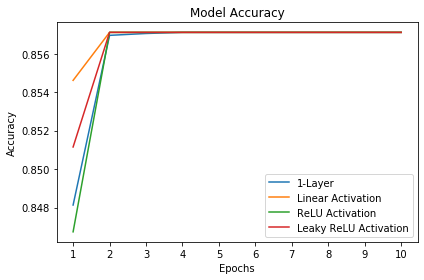

In [359]:
orig_accuracy = history.history['accuracy']
deep_accuracy = deep_history.history['accuracy']
relu_accuracy = relu_history.history['accuracy']
leaky_accuracy = leaky_history.history['accuracy']

epochs = range(1,11)

plt.plot(epochs, orig_accuracy, label='1-Layer')
plt.plot(epochs, deep_accuracy, label='Linear Activation')
plt.plot(epochs, relu_accuracy, label='ReLU Activation')
plt.plot(epochs, leaky_accuracy, label='Leaky ReLU Activation')


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,11,1))

plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()

plt.show()

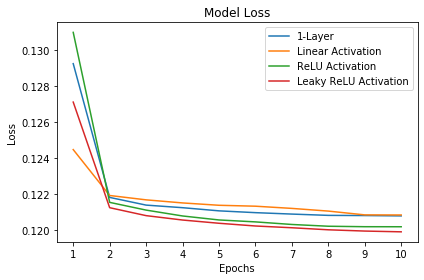

In [357]:
orig_loss = history.history['loss']
deep_loss = deep_history.history['loss']
relu_loss = relu_history.history['loss']
leaky_loss = leaky_history.history['loss']

plt.plot(epochs, orig_loss, label='1-Layer')
plt.plot(epochs, deep_loss, label='Linear Activation')
plt.plot(epochs, relu_loss, label='ReLU Activation')
plt.plot(epochs, leaky_loss, label='Leaky ReLU Activation')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks(np.arange(1,11,1))

plt.title('Model Loss')
plt.legend()

plt.tight_layout()

plt.show()

# Post Lookup

In [105]:
import requests
import praw

In [100]:
payload = {'id': 't3_1u4nrps'}
url = "https://oauth.reddit.com/api/info"
r = requests.get(url, params=payload)

In [99]:
r

<Response [403]>

In [121]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,345.0,298.0,0.756522,0.017391,0.086957,...,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,101.0,98.0,0.742574,0.019802,0.049505,...,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,85.0,85.0,0.752941,0.023529,0.082353,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,1124.0,949.0,0.772242,0.001779,0.057829,...,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,715.0,622.0,0.777622,0.006993,0.025175,...,0.016667,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333


In [107]:
app_id = "WNPRavmctL1k7A"
secret = "5i7KCyyzmGprUMxWf7Z_HVoncyI"
agent = "pc:com.example.myredditapp:v6.5.1 (by /u/punsandunicorns)"
username = ""
password = ""

In [108]:
reddit = praw.Reddit(client_id=app_id,
                     client_secret=secret,
                     user_agent=agent,
                     username=username,
                     password=password)

In [110]:
submission = reddit.submission(id='39zje0')
print(submission.title)

reddit will soon only be available over HTTPS


In [114]:
subreddit = reddit.subreddit('leagueoflegends')


In [118]:
subreddit.subscribers

3967522

In [119]:
submission = reddit.submission(id='1u4nrps')

In [120]:
submission.author

NotFound: received 404 HTTP response